In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import warnings

In [20]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y]=1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [21]:
#we define our activation functions and its derivative
def sig(x):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        result = 1 / (1 + np.exp(-x))
    return result

def d_sig(x):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        result = (sig(x)*(1-sig(x)))
    return result
#we define our activation functions and its derivative
# def sig(x):
#     return np.tanh(x)

# def d_sig(x):
#     return (1/np.cosh(x))**2

In [22]:
#we initlaize weights and biases as random
def init_params(X,n1=10,n2=10):
    global W_3,B_3,W_2,B_2,W_1,B_1
    m,n = X.shape
    W_3= np.random.randn(10,n2)
    W_2= np.random.randn(n2,n1)    
    W_1= np.random.randn(n1,m)  
    B_3 = np.random.randn(10,1)
    B_2 = np.random.randn(n2,1)    
    B_1 = np.random.randn(n1,1)    

In [23]:
#we define the network functions
def network_function(X,Y):
    global W_3,B_3,W_2,B_2,W_1,B_1
    A_0 = X
    Z_1 = W_1@A_0 +B_1
    A_1 = sig(Z_1)
    Z_2 = W_2@A_1 +B_2
    A_2 = sig(Z_2)
    Z_3 = W_3@A_2 +B_3 
    #A_3 is actual output
    A_3 = sig(Z_3)
    C=A_3-Y
    a,b=C.shape
    C=np.sum(C,axis=1,keepdims=True)/b
    C=np.linalg.norm(C)
    return C,A_3,Z_3,A_2,Z_2,A_1,Z_1,A_0

def network_function_test(X):
    global W_3,B_3,W_2,B_2,W_1,B_1
    A_0 = X
    Z_1 = W_1@A_0 +B_1
    A_1 = sig(Z_1)
    Z_2 = W_2@A_1 +B_2
    A_2 = sig(Z_2)
    Z_3 = W_3@A_2 +B_3 
    #A_3 is actual output
    A_3 = sig(Z_3)
    return A_3    

In [24]:
def back_propagation(X,A_3,Z_3,A_2,Z_2,A_1,Z_1,A_0,Y):
    global W_3,B_3,W_2,B_2,W_1,B_1
    (m,n)=X.shape
    
    H_3= (A_3-Y)*d_sig(Z_3)
    
    J_W3=2*(H_3@A_2.T)/n
    J_B3=2*(np.sum(H_3,axis=1,keepdims=True))/n
    
    H_2= (H_3.T@ W_3).T * d_sig(Z_2)
    
    J_W2 = 2*(H_2@A_1.T)/n
    J_B2 = 2*(np.sum(H_2,axis=1,keepdims=True))/n
    
    H_1= (H_2.T@ W_2).T * d_sig(Z_1)
    
    J_W1 = 2*(H_1@A_0.T)/n
    J_B1 = 2*(np.sum(H_1,axis=1,keepdims=True))/n
    
    #we return our jacobians
    return J_W3,J_B3,J_W2,J_B2,J_W1,J_B1

In [25]:
def get_predicitons(A3):
    #if A3 is
    # 0.3 0.5 1.2 ... 
    # 0.4 0.1 0.6 ...  ^
    # 0.2 1.3 0.4 ...  | axis 0 max value index
    #gives[1,2,0] perdictions of each column
    return np.argmax(A3,0)

def get_accuracy(predictions,Y):
    #gives label of each column
    Y_values=np.argmax(Y,0)
    print(predictions,Y_values)
    return np.sum(predictions==Y_values)/Y_values.size


#No need any explanation
#X should be a m*n array and y an 10*n array
def train_network(X,Y,iteration,learning_rate=0.1):
    global W_3,B_3,W_2,B_2,W_1,B_1
    alpha = learning_rate
    for i in range(0,iteration):
        C,A_3,Z_3,A_2,Z_2,A_1,Z_1,A_0 = network_function(X,Y)

        J_W3,J_B3,J_W2,J_B2,J_W1,J_B1 = back_propagation(X,A_3,Z_3,A_2,Z_2,A_1,Z_1,A_0,Y)
        W_3 = W_3 - alpha *J_W3
        W_2 = W_2 - alpha *J_W2
        W_1 = W_1 - alpha *J_W1
        B_3 = B_3 - alpha *J_B3
        B_2 = B_2 - alpha *J_B2
        B_1 = B_1 - alpha *J_B1
        if(i%10==0):
            print("Iteration: ",i)
            print("Accuracy: ",get_accuracy(get_predicitons(A_3),Y))
#             print("error: ",C)

In [26]:
# #X will be one data set i.e mx1 array
# def network_prediction(X):
#     prediction = network_function_test(X)
#     #use an decoder to ouput something like 0,0,0,1,0,0,0,0,0 = 3
#     return prediction

In [46]:
#below we take data and oragnize it
data= pd.read_csv("./train.csv")

In [47]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#we take array
data = data.to_numpy()
#n=np.of inputs and m= no.of features+1 i.e  (label)
n,m = data.shape
#to avoid overfitting, we train on portion of train data
#since we are storing biases in disk we need to shuffle the train dataset such that we can reproduce it
np.random.seed(10)
np.random.shuffle(data) #shuffles along row
data

array([[7, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
#now we take out some train and test data from the array
data_test=data[0:1000].T #making sure 1 column is one dataset
# label: a b c d ....
# p1:    a b c d ....
# p2:    a b c d ....
Y_test = data_test[0] #label row
X_test = data_test[1:m] #pixels row

data_train = data[1000:n].T
Y_train = data_train[0]
X_train=data_train[1:m]

In [14]:
print(X_train.shape)
#Y is just a label value 1 ,2 ,3 ,4 .. we need to encode it to output values
print(Y_train.shape)
print(Y_train[0])

Y_train = one_hot(Y_train)
Y_test = one_hot(Y_test)
print(Y_train.shape)
print(Y_train[:,0])

(784, 41000)
(41000,)
5
(10, 41000)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h1>Waitttttt</h1>
<h2>Run init_params line if you want to restart training else run the next line</h2>

In [15]:
# init_params(X_train)

In [49]:
try:
    #if any file is not found to load biases and wights just reset parameters
    W_3=np.load('W_3.npy')
    W_2=np.load('W_2.npy')
    W_1=np.load('W_1.npy')
    B_3=np.load('B_3.npy')
    B_2=np.load('B_2.npy')
    B_1=np.load('B_1.npy')
except:
    print("One or more file not found reinitializing parameters")
#     init_params(X_train)

One or more file not found reinitializing parameters


In [57]:
#if you have already trained data then load from file trained_data.txt: to be implemented
train_network(X_train,Y_train,iteration=2000,learning_rate=10)
#saving parameters
np.save('W_3.npy',W_3)
np.save('W_2.npy',W_2)
np.save('W_1.npy',W_1)
np.save('B_3.npy',B_3)
np.save('B_2.npy',B_2)
np.save('B_1.npy',B_1)

Iteration:  0
[5 5 5 ... 5 5 5] [5 1 7 ... 9 8 4]
Accuracy:  0.08190243902439025
Iteration:  10
[0 6 0 ... 0 6 2] [5 1 7 ... 9 8 4]
Accuracy:  0.17541463414634145
Iteration:  20
[0 6 0 ... 0 6 2] [5 1 7 ... 9 8 4]
Accuracy:  0.18280487804878048
Iteration:  30
[0 6 2 ... 0 6 2] [5 1 7 ... 9 8 4]
Accuracy:  0.2015609756097561
Iteration:  40
[2 6 2 ... 0 6 2] [5 1 7 ... 9 8 4]
Accuracy:  0.22063414634146342
Iteration:  50
[2 6 6 ... 0 6 2] [5 1 7 ... 9 8 4]
Accuracy:  0.22997560975609757
Iteration:  60
[2 6 6 ... 6 2 2] [5 1 7 ... 9 8 4]
Accuracy:  0.24290243902439024
Iteration:  70
[2 6 2 ... 2 2 2] [5 1 7 ... 9 8 4]
Accuracy:  0.24524390243902439
Iteration:  80
[2 2 8 ... 2 2 2] [5 1 7 ... 9 8 4]
Accuracy:  0.2472439024390244
Iteration:  90
[2 2 2 ... 2 2 2] [5 1 7 ... 9 8 4]
Accuracy:  0.2531219512195122
Iteration:  100
[2 2 2 ... 2 2 2] [5 1 7 ... 9 8 4]
Accuracy:  0.25726829268292684
Iteration:  110
[3 5 3 ... 3 3 3] [5 1 7 ... 9 8 4]
Accuracy:  0.27626829268292685
Iteration:  120
[8

Iteration:  1010
[5 1 7 ... 9 8 4] [5 1 7 ... 9 8 4]
Accuracy:  0.8609024390243902
Iteration:  1020
[5 1 7 ... 9 3 4] [5 1 7 ... 9 8 4]
Accuracy:  0.8592926829268293
Iteration:  1030
[5 1 7 ... 9 3 4] [5 1 7 ... 9 8 4]
Accuracy:  0.8508048780487805
Iteration:  1040
[5 1 7 ... 9 2 4] [5 1 7 ... 9 8 4]
Accuracy:  0.8605609756097561
Iteration:  1050
[5 1 7 ... 9 3 4] [5 1 7 ... 9 8 4]
Accuracy:  0.8673170731707317
Iteration:  1060
[5 1 7 ... 9 8 4] [5 1 7 ... 9 8 4]
Accuracy:  0.860390243902439
Iteration:  1070
[5 1 7 ... 9 8 4] [5 1 7 ... 9 8 4]
Accuracy:  0.8657317073170732
Iteration:  1080
[5 1 7 ... 9 2 4] [5 1 7 ... 9 8 4]
Accuracy:  0.8708536585365854
Iteration:  1090
[5 1 7 ... 9 3 4] [5 1 7 ... 9 8 4]
Accuracy:  0.8641707317073171
Iteration:  1100
[5 1 7 ... 9 8 4] [5 1 7 ... 9 8 4]
Accuracy:  0.8658536585365854
Iteration:  1110
[5 1 7 ... 9 2 4] [5 1 7 ... 9 8 4]
Accuracy:  0.8634878048780488
Iteration:  1120
[5 1 7 ... 9 2 4] [5 1 7 ... 9 8 4]
Accuracy:  0.8687317073170732
Itera

<h1>Run cell below repeatedly for testing</h1>

Prediction:  [7]
Actual label:  [7]


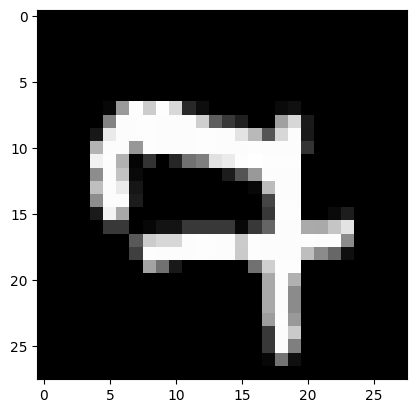

In [62]:
m1,n1 = X_test.shape
m2,n2 = Y_test.shape
index =  random.randint(0,n2)
plot_data = X_test[:,index].reshape(28,28)
X_data = X_test[:,index].reshape(m1,1) #we need values along columns
Y_data = Y_test[:,index].reshape(m2,1)
A_3_OUT = network_function_test(X_data)
print("Prediction: ",get_predicitons(A_3_OUT))
print("Actual label: ",np.argmax(Y_data,0))
plot_data = plot_data * 255
plt.gray()
plt.imshow(plot_data,interpolation="nearest")
plt.show()